Tisya Sharma

Professor Miguel Fuentes-Cabrera

DS 4400

25 Sept. 2025

HOMEWORK #2

In [1]:
# Import libraries that may be necessary for this file
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Work for Gradient Descent Regression I Part (A)

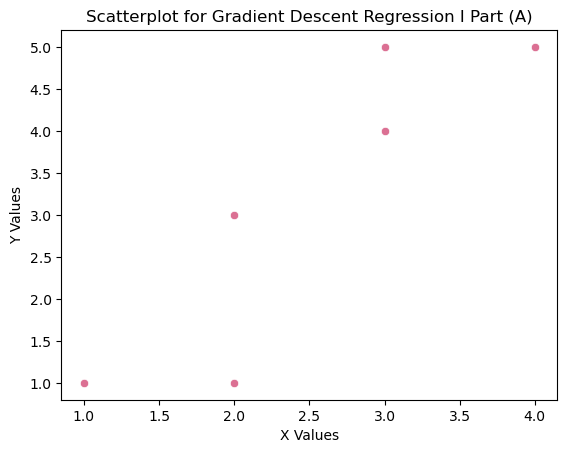

In [2]:
# Plot the x and y data

# Create 2 column vectors of features (x and y)
x = np.array([[1], 
              [2], 
              [2], 
              [3], 
              [3], 
              [4]])

y = np.array([[1], 
              [1], 
              [3], 
              [4], 
              [5], 
              [5]])

sns.scatterplot(x = x.ravel(), y = y.ravel(), color = "palevioletred")
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatterplot for Gradient Descent Regression I Part (A)')
plt.show()

### Work for Gradient Descent Regression I Part (B)

In [3]:
# Build the phi matrix
phi = np.hstack([x, np.ones((len(x), 1))])

# Make weights w1 and w2 equal to 0
w = np.zeros((2, 1))


'''
# Get learning rate and number of iterations from the user
lr = float(input("Enter the learning rate: "))
niter = int(input("Enter the number of iterations: "))
'''

# Hardcode the learning rate and number of interations for the purpose of this HW
lr = 0.01
niter = 200

# Run gradient descent for niter steps in a loop
for i in range(niter):
    # Predict values with current weights (matrix multiplication)
    y_pred = np.dot(phi, w)
    # Compute the error (difference between predicted and actual)
    error = y_pred - y
    # Gradient of the mean squared error w.r.t. weights
    grad = (2/len(x)) * np.dot(phi.T, error)
    # Update the weights by moving opposite to the gradient
    w = w - lr * grad

# Get final learned weights and assign to w1 and w2
w1, w2 =  w.ravel()

# Print the final equation
print(f"Final weights: w1 = {w1:.4f}, w2 = {w2:.4f}")
print(f"The learned function is: f(x) = {w1:.4f} * x + {w2:.4f}")



Final weights: w1 = 1.2970, w2 = 0.0040
The learned function is: f(x) = 1.2970 * x + 0.0040


### Work for Gradient Descent Regression I Part (C)

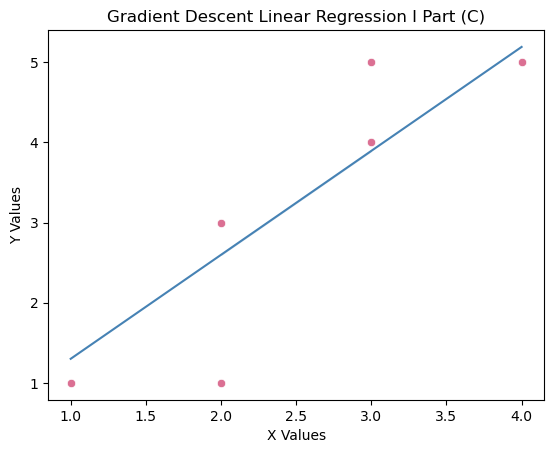

In [4]:
# Learned weights from Part B 
# w1 and w2 defined from the gradient descent loop
# Define the learned function
def f(x):
    return w1 * x + w2

# Predicted y values for each x
y_pred = f(x.ravel())

# Scatter plot of original data points
sns.scatterplot(x = x.ravel(), y = y.ravel(), color = "palevioletred")

# Plot the fitted regression line
sns.lineplot(x = x.ravel(), y = y_pred, color = "steelblue")

# Labels and title
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Gradient Descent Linear Regression I Part (C)")
plt.show()

### Work for Gradient Descent Regression II Part (A)

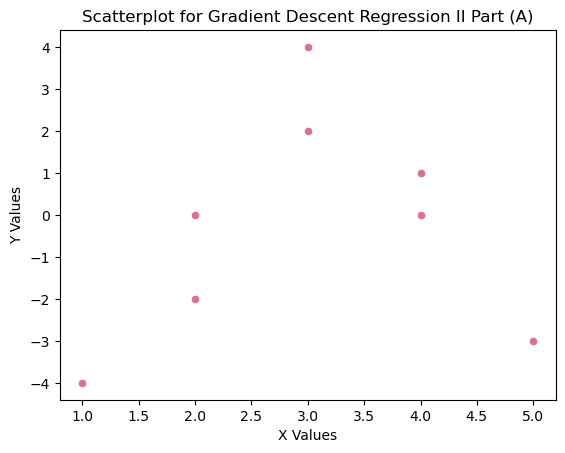

In [5]:
# Plot the x and y data

# Create 2 column vectors of features (x and y)
x = np.array([[1], 
              [2], 
              [2], 
              [3], 
              [3], 
              [4],
              [4],
              [5]],
              dtype = float)

y = np.array([[-4], 
              [0], 
              [-2], 
              [4], 
              [2], 
              [0],
              [1],
              [-3]], 
              dtype = float)

sns.scatterplot(x = x.ravel(), y = y.ravel(), color = "palevioletred")
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Scatterplot for Gradient Descent Regression II Part (A)')
plt.show()


### Work for Gradient Descent Regression II Part (B)

In [6]:
# Center x
x_bar = float(x.mean())
z = x - x_bar

# Data points don't look linear, try polynomial regression instead
# Build phi for quadratic model
phi = np.hstack([z**2, z, np.ones((len(x), 1))])

# Initialize weights
w = np.zeros((3, 1))

# Change the learning rate and iterations to apply to polynomial regression
lr = 0.01
niter = 2000

# Gradient descent loop
for i in range(niter):
    y_pred = np.dot(phi, w)
    error = y_pred - y
    grad = (2/len(x)) * np.dot(phi.T, error)
    w = w - lr * grad

# Extract weights
w2, w1, w0 = w.ravel()

# Print the centered-basis function
print(f"The learned centered-basis function: f(x) = {w2:.4f}*(x - {x_bar:.1f})^2 + {w1:.4f}*(x - {x_bar:.1f}) + {w0:.4f}")

# Expand to the standard form for another form of reporting
w1_expanded = -2 * w2 * x_bar + w1
w0_expanded = w2 * (x_bar**2) - w1 * x_bar + w0
print(f"The learned expanded function: f(x) = {w2:.4f}x^2 + {w1_expanded:.4f}x + {w0_expanded:.4f}")

The learned centered-basis function: f(x) = -1.4444*(x - 3.0)^2 + 0.4167*(x - 3.0) + 1.9167
The learned expanded function: f(x) = -1.4444x^2 + 9.0833x + -12.3333


### Work for Gradient Descent Regression II Part (C)

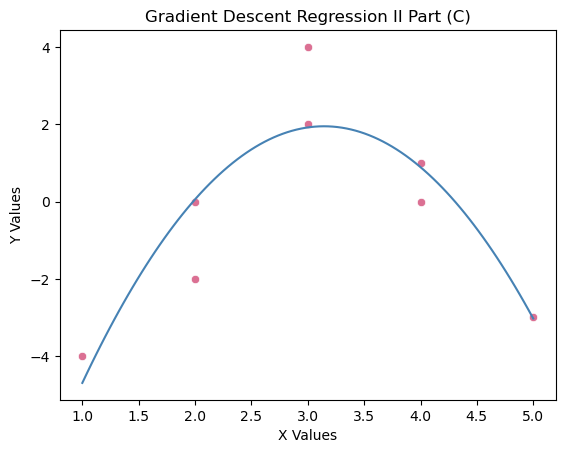

In [7]:
def f(x):
    return w2 * x**2 + w1_expanded * x + w0_expanded

# Smooth curve
x_line = np.linspace(x.min(), x.max(), 100).ravel()
y_line = f(x_line)

# Plot
sns.scatterplot(x = x.ravel(), y = y.ravel(), color = "palevioletred")
sns.lineplot(x = x_line, y = y_line, color = 'steelblue')

# Labels and title
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.title("Gradient Descent Regression II Part (C)")
plt.show()


### Work for Gradient Descent Regression III Part (A)

In [8]:
# Read CSV
df = pd.read_csv("numonly_gtky.csv")

# Display first few rows
df.head()

,17,12
0,17,0
1,17,15
2,16,3
3,16,0
4,17,0


### Work for Gradient Descent Regression III Part (B)

In [9]:
# Extract x (credit hours) and y (work hours) as column vectors
x = df.iloc[:, 0].values.reshape(-1, 1) 
y = df.iloc[:, 1].values.reshape(-1, 1)

# Build phi = [x, 1]
phi = np.hstack([x, np.ones((len(x), 1))])

# Initialize weights
w = np.zeros((2,1))

# Learning rate and iterations
lr = 0.001
niter = 2000

# Gradient descent loop
for i in range(niter):
    y_pred = np.dot(phi, w)
    error = y_pred - y
    grad = (2/len(x)) * np.dot(phi.T, error)
    w = w - lr * grad

# Extract weights
w1, w0 = w.ravel()

print(f"Final weights: w1 = {w1:.4f}, w0 = {w0:.4f}")
print(f"The learned function is: f(x) = {w1:.4f}*x + {w0:.4f}")


Final weights: w1 = 0.3378, w0 = 0.4496
The learned function is: f(x) = 0.3378*x + 0.4496


### Work for Gradient Descent Regression III Part (C)

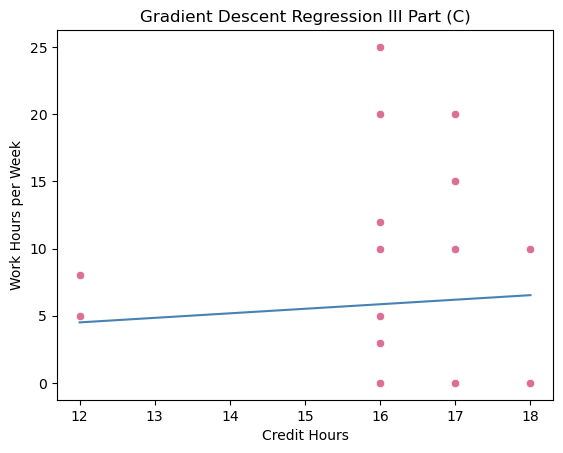

R² score: -0.0165


In [10]:
# Scatter plot of data points
sns.scatterplot(x = x.ravel(), y = y.ravel(), color = "palevioletred")

# Regression line
x_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
phi_line = np.hstack([x_line, np.ones((len(x_line), 1))])
y_line = np.dot(phi_line, w)

# Plot fitted line
sns.lineplot(x = x_line.ravel(), y = y_line.ravel(), color = "steelblue")

# Labels and title
plt.xlabel("Credit Hours")
plt.ylabel("Work Hours per Week")
plt.title("Gradient Descent Regression III Part (C)")
plt.show()

# Compute R² score to check the goodness of fit
y_pred_train = np.dot(phi, w)
ss_res = np.sum((y - y_pred_train) ** 2)
ss_tot = np.sum((y - y.mean()) ** 2)
r2 = 1 - ss_res / ss_tot

print(f"R² score: {r2:.4f}")

### Work for Gradient Descent Regression III Part (D)

In [11]:
# Prediction for a student taking 15 credit hours
credit_hours = 15
predicted_work_hours = w1 * credit_hours + w0
print(f"If a student is taking {credit_hours} credit hours, the model predicts {predicted_work_hours:.2f} work hours per week.")

If a student is taking 15 credit hours, the model predicts 5.52 work hours per week.


### Work for Gradient Descent Regression III Part (E)

The model does **not** seem to fit the data well. The R² value is close to zero (slightly negative),
which means that credit hours do not explain the variation in work hours for these students. 
The data points are very scattered with no clear linear trend, and the fitted line is almost flat.

**Next steps:**
- (a) If the model had fit well, we could use it to predict work hours based on credit hours.  
- (b) Since it doesn’t fit well, possible improvements could be:
  * Adding more features (e.g., student year, job type, major).  
  * Trying polynomial regression or non-linear models.  
  * Collecting more data to reduce noise.
